# Cardiovascular Disease Prediction

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score
import joblib

# Set the style for the plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Set random seed for reproducibility
np.random.seed(42)


## 1. Data Loading and Exploration


In [20]:
# Load the dataset
data_path = 'data/card.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
# Check for missing values
print("Missing values:")
df.isnull().sum()


Missing values:


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [22]:
# Statistical summary of the dataset
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Convert age from days to years for better interpretability
df['age_years'] = df['age'] / 365.25
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.357290
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.381246
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.627652
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.249144
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.841205


## 2. Data Visualization


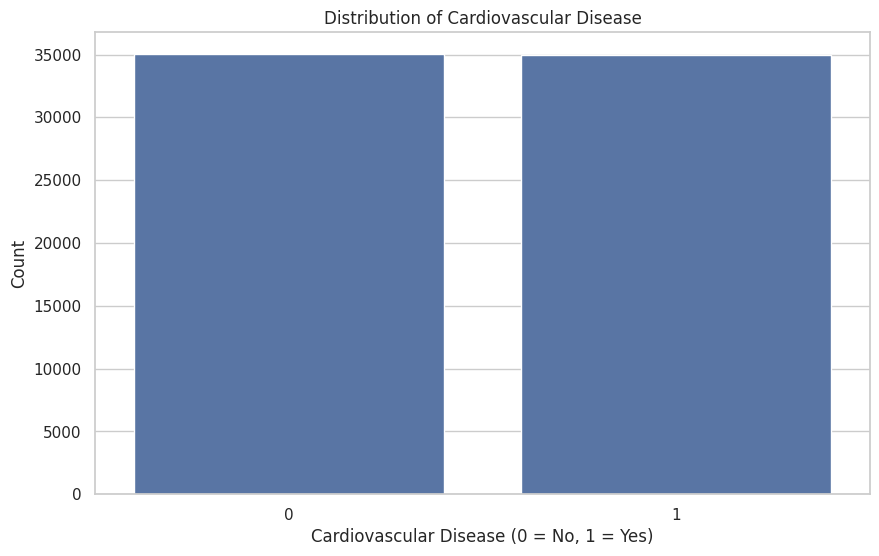

In [24]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


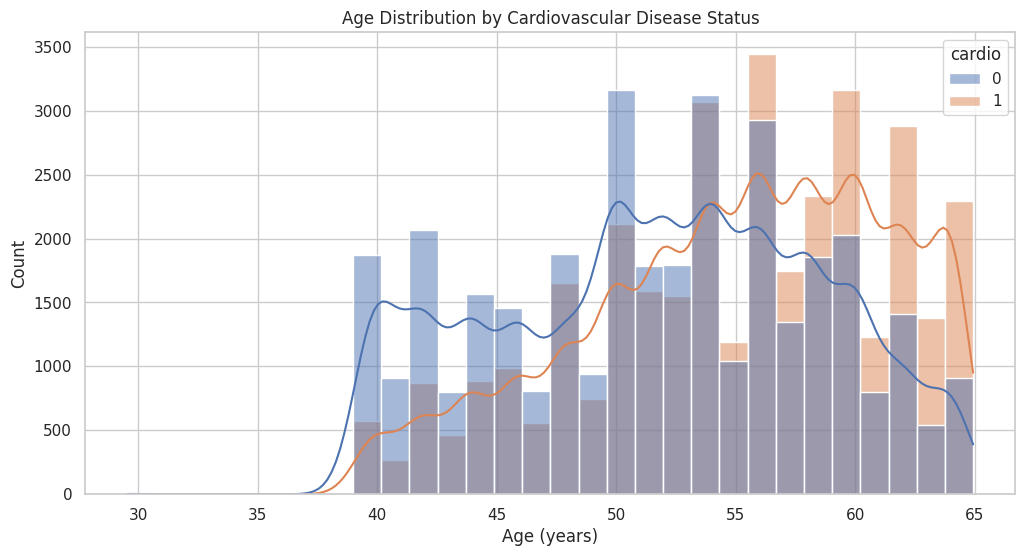

In [25]:
# Age distribution by cardiovascular disease status
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age_years', hue='cardio', kde=True, bins=30)
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


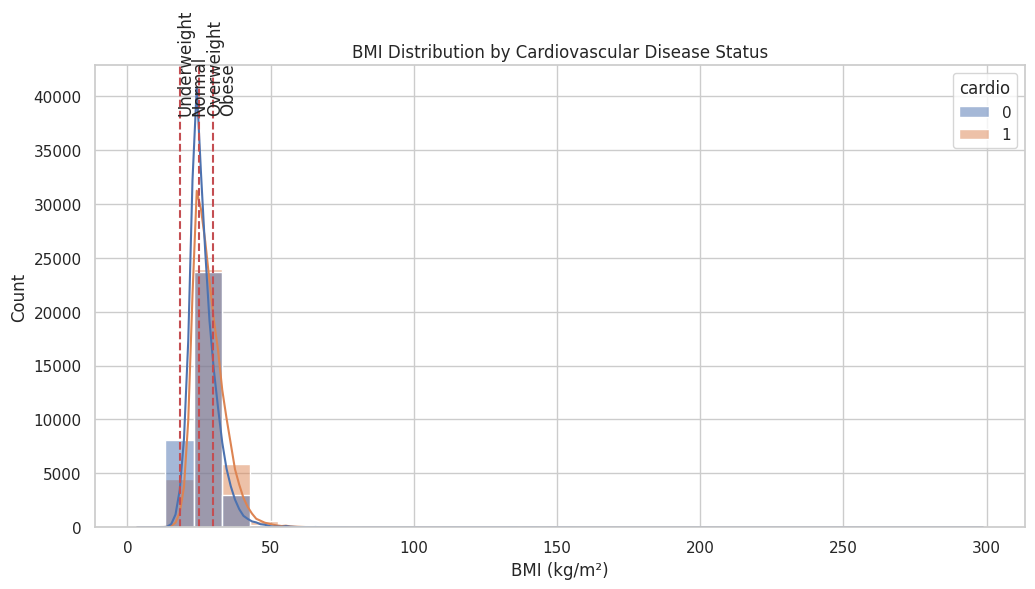

In [26]:
# BMI calculation and visualization
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='bmi', hue='cardio', kde=True, bins=30)
plt.title('BMI Distribution by Cardiovascular Disease Status')
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Count')
plt.axvline(x=18.5, color='r', linestyle='--')
plt.axvline(x=25, color='r', linestyle='--')
plt.axvline(x=30, color='r', linestyle='--')
plt.text(17, plt.ylim()[1]*0.9, 'Underweight', rotation=90)
plt.text(22, plt.ylim()[1]*0.9, 'Normal', rotation=90)
plt.text(27.5, plt.ylim()[1]*0.9, 'Overweight', rotation=90)
plt.text(32, plt.ylim()[1]*0.9, 'Obese', rotation=90)
plt.show()


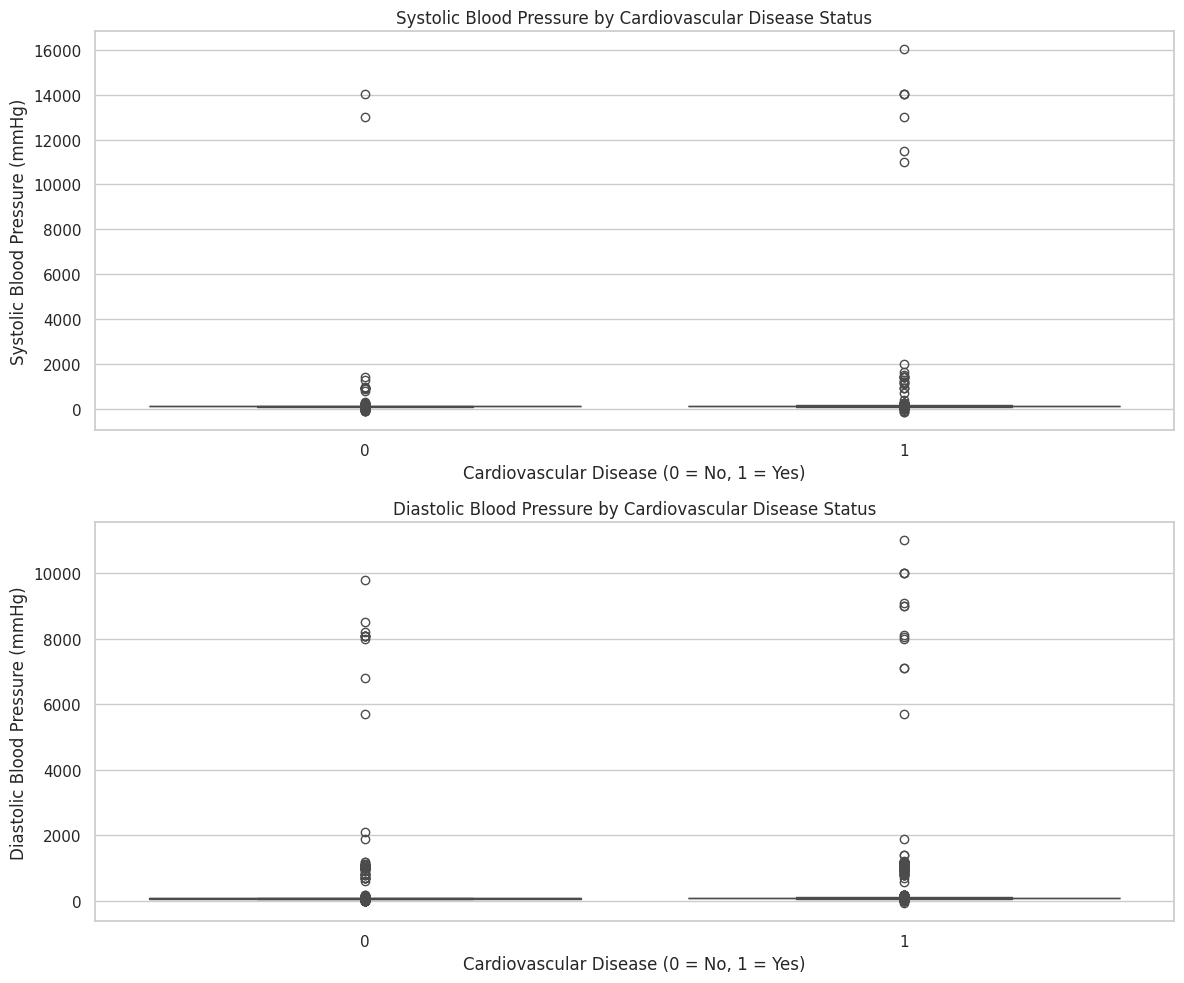

In [27]:
# Blood pressure visualization
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title('Systolic Blood Pressure by Cardiovascular Disease Status')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Systolic Blood Pressure (mmHg)')

plt.subplot(2, 1, 2)
sns.boxplot(x='cardio', y='ap_lo', data=df)
plt.title('Diastolic Blood Pressure by Cardiovascular Disease Status')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()


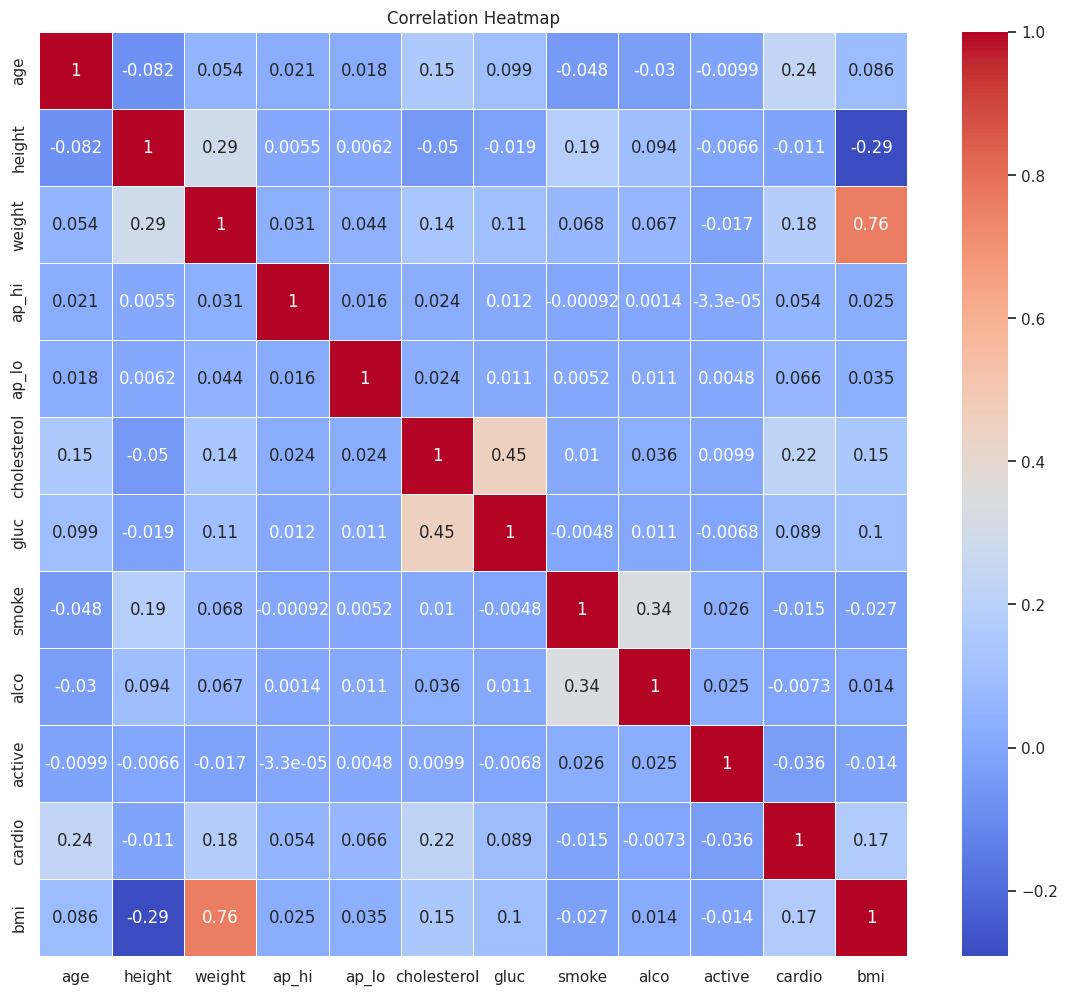

In [30]:
# Correlation heatmap
# Select numeric columns for correlation
numeric_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## 3. Data Preprocessing


In [32]:
# Filter out physiologically impossible blood pressure values
df_filtered = df[(df['ap_hi'] > 0) & (df['ap_hi'] < 300) & 
                 (df['ap_lo'] > 0) & (df['ap_lo'] < 200) &
                 (df['height'] > 100) & (df['height'] < 250) &
                 (df['weight'] > 30) & (df['weight'] < 300)]

print(f"Original dataset shape: {df.shape}")
print(f"Filtered dataset shape: {df_filtered.shape}")
print(f"Removed {df.shape[0] - df_filtered.shape[0]} records ({(df.shape[0] - df_filtered.shape[0])/df.shape[0]*100:.2f}%)")

# Use the filtered dataset for further analysis
df = df_filtered


Original dataset shape: (70000, 15)
Filtered dataset shape: (68943, 15)
Removed 1057 records (1.51%)


In [33]:
# Prepare features and target
# Drop ID column and age_years (derived feature) and bmi (derived feature)
X = df.drop(['id', 'age_years', 'bmi', 'cardio'], axis=1)
y = df['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 55154 samples
Testing set size: 13789 samples


In [34]:
# Standardize the numerical features
# Identify numerical features (excluding binary features)
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_features = ['cholesterol', 'gluc', 'gender', 'smoke', 'alco', 'active']

# Create a copy of the training and testing data
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Standardize numerical features
scaler = StandardScaler()
X_train_processed[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_processed[numerical_features] = scaler.transform(X_test[numerical_features])

# Save the scaler for later use in the API
joblib.dump(scaler, 'models/scaler.pkl')

# Display the processed data
X_train_processed.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
13016,-0.807172,1,0.703195,-0.077534,-0.641808,-0.648801,1,1,0,0,1
30383,-0.546527,1,0.075898,-0.986660,-0.358114,-0.137909,1,1,0,0,1
19364,-1.100245,1,0.452276,-0.497131,-2.060280,-1.159693,1,1,0,0,1
55350,-0.254671,1,-1.053236,0.761660,0.776663,0.883874,2,2,0,0,0
40499,0.666705,1,-1.931452,-1.196459,-0.925503,-1.159693,1,1,0,0,1


## 4. Model Training and Evaluation

### 4.1 Linear Regression


In [35]:
# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test_processed)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
evs_lin = explained_variance_score(y_test, y_pred_lin)

print(f"Linear Regression - Mean Squared Error: {mse_lin:.4f}")
print(f"Linear Regression - Root Mean Squared Error: {rmse_lin:.4f}")
print(f"Linear Regression - R² Score: {r2_lin:.4f}")
print(f"Linear Regression - Mean Absolute Error: {mae_lin:.4f}")
print(f"Linear Regression - Explained Variance Score: {evs_lin:.4f}")


Linear Regression - Mean Squared Error: 0.1976
Linear Regression - Root Mean Squared Error: 0.4445
Linear Regression - R² Score: 0.2096
Linear Regression - Mean Absolute Error: 0.3989
Linear Regression - Explained Variance Score: 0.2096


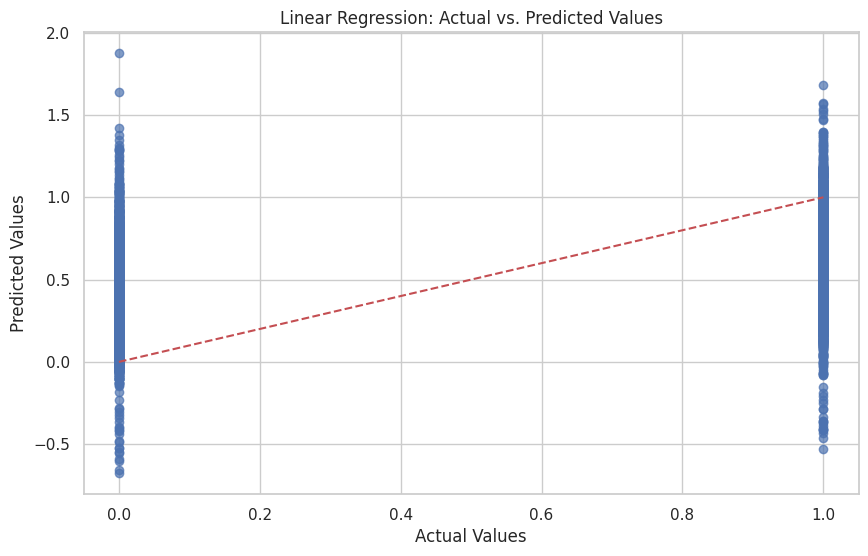

In [36]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.show()


### 4.2 Decision Tree Regressor


In [39]:
# Train a decision tree regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_processed, y_train)

# Make predictions
y_pred_dt = dt_reg.predict(X_test_processed)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
evs_dt = explained_variance_score(y_test, y_pred_dt)

print(f"Decision Tree - Mean Squared Error: {mse_dt:.4f}")
print(f"Decision Tree - Root Mean Squared Error: {rmse_dt:.4f}")
print(f"Decision Tree - R² Score: {r2_dt:.4f}")
print(f"Decision Tree - Mean Absolute Error: {mae_dt:.4f}")
print(f"Decision Tree - Explained Variance Score: {evs_dt:.4f}")


Decision Tree - Mean Squared Error: 0.3694
Decision Tree - Root Mean Squared Error: 0.6078
Decision Tree - R² Score: -0.4777
Decision Tree - Mean Absolute Error: 0.3695
Decision Tree - Explained Variance Score: -0.4774


### 4.3 Random Forest Regressor


In [43]:
# Train a random forest regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_processed, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test_processed)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
evs_rf = explained_variance_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf:.4f}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")
print(f"Random Forest - Mean Absolute Error: {mae_rf:.4f}")
print(f"Random Forest - Explained Variance Score: {evs_rf:.4f}")


Random Forest - Mean Squared Error: 0.2013
Random Forest - Root Mean Squared Error: 0.4486
Random Forest - R² Score: 0.1948
Random Forest - Mean Absolute Error: 0.3712
Random Forest - Explained Variance Score: 0.1949


## 5. Model Comparison and Selection


In [48]:
# Compare the models
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [mse_lin, mse_dt, mse_rf]
rmse_scores = [rmse_lin, rmse_dt, rmse_rf]
r2_scores = [r2_lin, r2_dt, r2_rf]
mae_scores = [mae_lin, mae_dt, mae_rf]
evs_scores = [evs_lin, evs_dt, evs_rf]

comparison_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R²': r2_scores,
    'MAE': mae_scores,
    'EVS': evs_scores
})
# Sort by MSE (lower is better)
comparison_df = comparison_df.sort_values('MSE')

print("Model Comparison:")
comparison_df


Model Comparison:


,Model,MSE,RMSE,R²,MAE,EVS
0,Linear Regression,0.197578,0.444498,0.209606,0.398943,0.209620
2,Random Forest,0.201270,0.448631,0.194839,0.371178,0.194901
1,Decision Tree,0.369389,0.607774,-0.477705,0.369497,-0.477402


## 6. Save the Best Model

Based on the comparison, we'll save the model with the lowest Mean Squared Error (MSE).


In [51]:
# Determine the best model based on MSE (lower is better)
best_model_index = np.argmin(mse_scores)
best_model_name = models[best_model_index]
print(f"The best model is: {best_model_name}")

# Save the best model
if best_model_name == 'Linear Regression':
    best_model = lin_reg
elif best_model_name == 'Decision Tree':
    best_model = dt_reg
else:  # Random Forest
    best_model = rf_reg

# Save the model to disk
joblib.dump(best_model, 'models/best_model.pkl')
print(f"Best model saved as 'models/best_model.pkl'")

# Save model info for the API
model_info = {
    'model_name': best_model_name,
    'features': list(X.columns),
    'mse': mse_scores[best_model_index],
    'rmse': rmse_scores[best_model_index],
    'r2': r2_scores[best_model_index],
    'mae': mae_scores[best_model_index],
    'evs': evs_scores[best_model_index]
}

import json
with open('models/model_info.json', 'w') as f:
    json.dump(model_info, f)
    
print(f"Model info saved as 'models/model_info.json'")

# Save the list of numerical features for the API
with open('models/numerical_features.json', 'w') as f:
    json.dump(numerical_features, f)
    
print(f"Numerical features list saved as 'models/numerical_features.json'")


The best model is: Linear Regression
Best model saved as 'models/best_model.pkl'
Model info saved as 'models/model_info.json'
Numerical features list saved as 'models/numerical_features.json'
